### Cloning my Git Repo

In [106]:
!git clone https://github.com/Jawakar-7/Image-Classification-using-multiple-models-.git

fatal: destination path 'Image-Classification-using-multiple-models-' already exists and is not an empty directory.


### Import the necessary files:

In [2]:
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [12]:
test_path='/content/Image-Classification-using-multiple-models-/Datasets/seg_test/seg_test'
train_path='/content/Image-Classification-using-multiple-models-/Datasets/seg_train/seg_train'

### Image data Generator
It is a library available in keras.preprocessing to extract images from class files and accordingly set class names for them (we need the images to be in a seperate class files for this function to work)
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

This is an effective way of accessing images instead of using the os package to parse through all the files one by one.

In [13]:
from sklearn.utils import column_or_1d
train_xgen=ImageDataGenerator(
    rescale=1.0/255,#Scaling Down the data
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.1,
)
X_train=train_xgen.flow_from_directory(
    train_path,
    target_size=(150,150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 14034 images belonging to 6 classes.


In [90]:
test_xgen=ImageDataGenerator(
    rescale=1.0/255
)
X_test=test_xgen.flow_from_directory(
    test_path,
    class_mode='categorical',
    target_size=(150,150),
    batch_size=32,
    color_mode='rgb',
    shuffle=True
)

Found 3000 images belonging to 6 classes.


The output of ImageDataGenerator is a Generator object.

In [91]:
labels={i:k for k,i in X_train.class_indices.items()}
for i,k in labels.items():
  print(f"{i}:{k}")

0:buildings
1:forest
2:glacier
3:mountain
4:sea
5:street


In [92]:
print(f"{len(X_train)} which is total images/32")

439 which is total images/32


In [95]:
for i,k in X_train:
  print(f"{i.shape}is a tuple that contains(batch size,target size and channel_size,) and k is the corresponding classes of 32 images {labels[np.argmax(k[0],axis=0)]} meaning the last class")
  break

(32, 150, 150, 3)is a tuple that contains(batch size,target size and channel_size,) and k is the corresponding classes of 32 images glacier meaning the last class


 So we have 439 batches of images each contains 32 images in size 32, 150 ,150, 3 shape and their corresponding labels .

In [63]:
X_train[0][1][0]#accesing the label of first element from the first batch

array([0., 0., 0., 0., 1., 0.], dtype=float32)

### Now that we have all our images in seperate classes we will try to visualize them using matplotlib

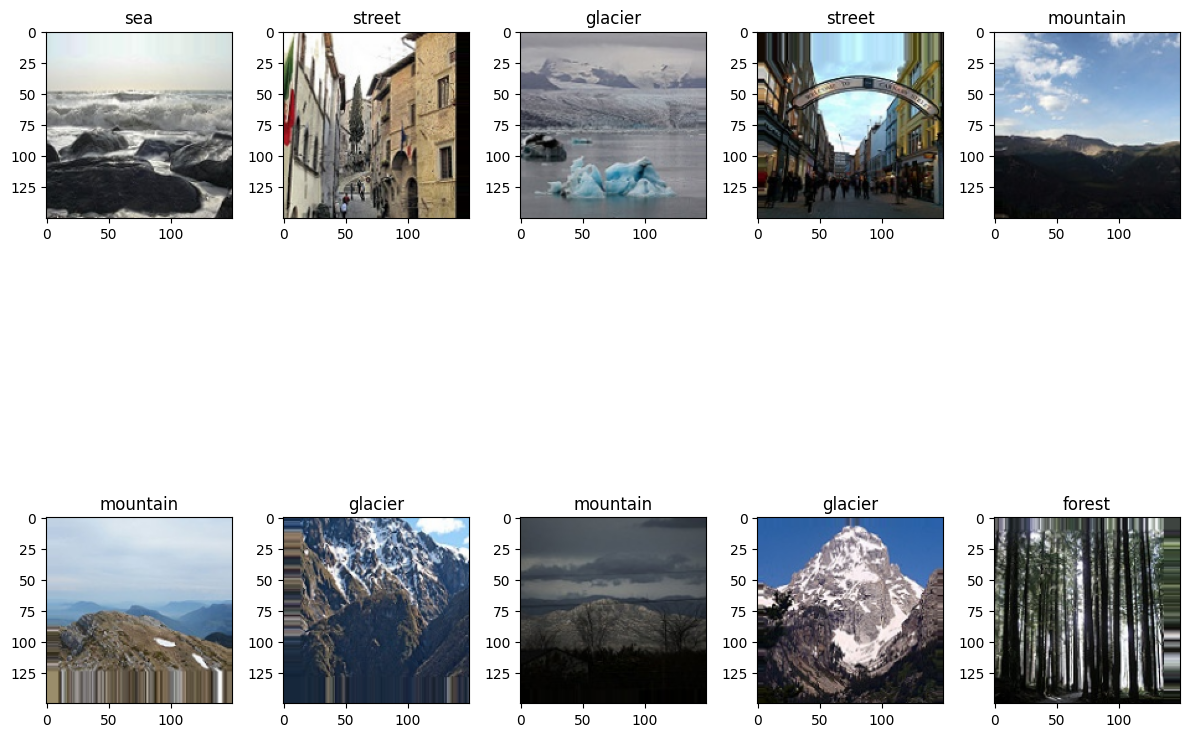

In [100]:
fig , ax=plt.subplots(ncols=5,nrows=2,figsize=(12,12))
t=0
for a in range(2):
    for  b in range(5):
      label=labels[np.argmax(X_train[0][1][t])]
      ax[a,b].set_title(label)
      ax[a,b].imshow(X_train[0][0][t][:,:,:])
      ax[a,b].axis='off'
      t+=1
plt.tight_layout()
plt.suptitle="Sample Training Images"
plt.show()



## Building a CNN Model
Padding:
https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480

####Strides:
By the way, does a filter always have to move one pixel at a time? Of course not. We can also make it move two steps or three steps at a time both in the horizontal and vertical ways. This is called ‘stride.’

Stride is a parameter that works in conjunction with padding, the feature that adds blank, or empty pixels to the frame of the image to allow for a minimized reduction of size in the output layer. Roughly, it is a way of increasing the size of an image, to counteract the fact that stride reduces the size. Padding and stride are the foundational parameters of any convolutional neural network.
Input:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
If you apply a filter with a size of 3 and a stride of 3, the filter would move as follows:

First position: [1, 2, 3] (covering indices 0, 1, and 2)
Second position: [4, 5, 6] (covering indices 3, 4, and 5)
Third position: [7, 8, 9] (covering indices 6, 7, and 8)

####Input Shape:
 4+D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.

####BatchNormalization Layer:
https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/
mainly to be added when we are dealing with multi class classification where images of same class can be of different colours.

add image


In [104]:
from keras.models import Sequential
from keras.layers import Activation , BatchNormalization , Dense , Dropout , Flatten , MaxPooling2D,Conv2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from  keras.models import Sequential

In [103]:
def CreateCNN():

  model=Sequential([
      Conv2D(filters=128,kernel_size=(5,5),activation='relu',input_shape=(150,150,3),strides=(1, 1),padding='valid',),
      Conv2D(filters=64,kernel_size=(5,5),activation='relu')
      MaxPooling2D((2,2)),






  ])



In [89]:
aa[1][1]


3